# Introduction to Neural Networking in Keras

We will use the version of Keras that comes in the Tensorflow package, as it has the most up to date tools.

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report,confusion_matrix,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense

# Data

We will be working with 2 different datasets in this project, 1 is a regression dataset and the other is a classification dataset.  This way you can practice doing both using deep learning.

**NOTE**

These datasets are very small for deep learning.  Deep learning models usually work best with very large datasets with at least 10,000 or more samples.  They work best on even larger datasets than that.  But, for demonstration we will use these smaller datasets.

## Regression
This is a dataset of medical charges based on age,sex,bmi, no of children, weather the person is smoker or not and region. Our target today will be the charges.



In [24]:
regression_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQJQrxI5M5hb0TVJu665uuiBUKKIHbjrBROTmiH7HJLpAvw8yRylx0vpin0Qt1LruZVC2IpO2z1yKfd/pub?output=csv")
regression_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Regression

Let's start with modeling the regression dataset

In [25]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [26]:
regression_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [27]:
regression_df.duplicated().any()

True

In [28]:
regression_df.drop_duplicates(inplace=True)

In [29]:
regression_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
# Define X and Y and complete the train test split
X = regression_df.drop(columns = 'charges')
y = regression_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [31]:
#instantiate
scaler = StandardScaler()
ohe = OneHotEncoder (handle_unknown='ignore', sparse = False)

#make column selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

#tuples
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

#column transform
preprocessed = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [32]:
# Fit and transform data
X_train = preprocessed.fit_transform(X_train)
X_test = preprocessed.transform(X_test)

### Plot History

Since we will be plotting histories for all of our models, lets create a function to do it quickly.

In [33]:
#  You can use this function to see how your model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()


## First Simple Model

We always want to start simple, as deep learning models can get very complex fast and more complex models take more time to train and are more prone to overfitting.  A well performing simple model is better than a well performing complex model.

## Input layer
The first layer we will define is not technically the input layer.  We will define the first hidden layer with a special argument that tells Keras how to create a hidden input layer:

`input_dim=`

## Activations

For the single hidden layer we will try just 10 nodes and use a ReLU activation.  ReLUs tend to perform well for hidden nodes. Linear activation function is used for regression problems.

## Output Layer

For out output layer (last layer) we just use 1 node because we only want 1 number to be outputted.  We will use a linear activation function.  This will simply output the value from the weights and bias in the node with no change.




In [34]:
# Create your model
reg_model = Sequential()
reg_model.add(Dense(10, activation = 'relu', input_dim = X_train.shape[1]))
reg_model.add(Dense(8,activation = 'linear'))
reg_model.add(Dense(1))
reg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


## Compiling

An Adam optimizer is a favorite and often performs well, it's a good place to start.  Our loss function, what our model will try to minimize, as well as our output metrics, what our model history will show, will both be mean squared error.

In [35]:
# Compile your model
reg_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

# Training

Let's try training our model for 100 few epochs.  Sometimes that is enough, and it will give us an idea whether our model is learning anything.

In [36]:
# Fit your model
history = reg_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100,verbose=0)

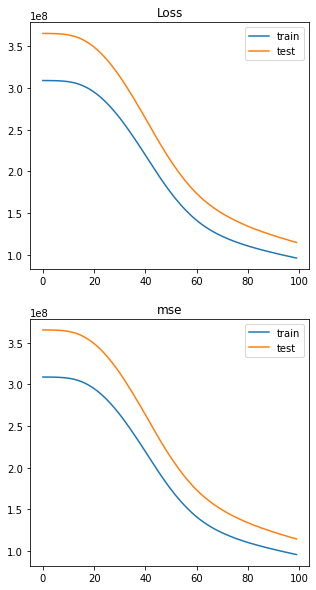

In [37]:
# Apply the custom function to see how your model is doing
plot_history(history, 'mse')

## Evaluation


In [38]:
# Make predictions and evaluate your model
train_preds = reg_model.predict(X_train)
test_preds = reg_model.predict(X_test)

print('training rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('testing rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))

training rmse: 9772.72395880354
testing rmse: 10702.01497301923


In [39]:
print(f"Train R-Squared: { r2_score(y_train, train_preds)}")
print(f"Test R-Squared: { r2_score(y_test, test_preds)}")

Train R-Squared: 0.3058338639670044
Test R-Squared: 0.33761351450313604


It seem our model has not yet bottomed out in learning.  This indicates we should train it longer.  

As long as we don't recompile our model, we can just fit it again and it will pick up the training where it left off


# Classification:

Classification models are similar, except that we need to adjust the final activation of the output layer, the loss function in the compile step, and the metrics we use to judge them.  Remember: MAE, MSE, RMSE, and R2 are regression metrics, accuracy, recall, precision, F1-Score, and confusion matrices are classification metrics.

## Classification Dataset
The classification dataset describes diabetes rates among Pima Indians.  Each row is a person and this dataset and includes features regarding health related measurements.  The target binary and represents whether or not a person will diagnosed with diabetes.  This is another old dataset first presented in 1988.



In [40]:
classification_df = pd.read_csv('https://raw.githubusercontent.com/ninja-josh/image-storage/main/diabetes.csv')
classification_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
classification_df.duplicated().any()

False

In [43]:
classification_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see minimums for Glucose, BloodPression, SkinThickness, Insulin, and BMI of 0s.  Those are impossible for humans, so lets drop those rows.

In [44]:
no_glucose = classification_df['Glucose'] == 0
no_blood = classification_df['BloodPressure'] == 0
no_skin = classification_df['SkinThickness'] == 0
no_insulin = classification_df['Insulin'] == 0
no_bmi = classification_df['BMI'] == 0

#class_df_clean excludes rows that have no values == 0 in the above columns
class_df_clean = classification_df[~(no_glucose |
                                     no_blood |
                                     no_skin |
                                     no_insulin |
                                     no_bmi)]
class_df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We lost a lot of data, going from 768 samples to 392 samples.  In the future we might impute this data using means, medians, or other imputation strategies.  For this exercise we won't focus on that.

In [45]:
# Define X and y and train test split
X = class_df_clean.drop(columns = 'Outcome')
y = class_df_clean['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [46]:
# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classification Model

We need to do a few things differently here:

Since this is a binary classification, the activation of our final layer needs to be 'sigmoid'.  If this were multiclass we would set this as 'softmax' and the number of output nodes would be the number of classes in our y_train.



In [48]:
# Build your model
# Create your model
n_cols = X_train.shape[1]
class_model = Sequential()
class_model.add(Dense(10, activation = 'relu', input_dim = n_cols))
class_model.add(Dense(10, activation = 'relu'))
class_model.add(Dense(1, activation = 'sigmoid'))


We need to change our loss to 'binary_crossentropy'.  If this were multiclass we would use 'categorical_crossentropy'.

Since MSE is a regression metric, not a classification metric, we change the metric to accuracy.  We could also use recall or precision. 

In [49]:
# Compile your model, to use our custom function, set metrics = ['acc']
class_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [50]:
# fit your model
history = class_model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100)



Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 0.6248 - accuracy: 0.7109 - val_loss: 0.6272 - val_accuracy: 0.7041
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6071 - accuracy: 0.7143 - val_loss: 0.6140 - val_accuracy: 0.7041
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5890 - accuracy: 0.7177 - val_loss: 0.6023 - val_accuracy: 0.7041
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5733 - accuracy: 0.7177 - val_loss: 0.5922 - val_accuracy: 0.7041
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 0.5590 - accuracy: 0.7279 - val_loss: 0.5839 - val_accuracy: 0.7041
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5465 - accuracy: 0.7279 - val_loss: 0.5765 - val_accuracy: 0.6837
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5353 - accuracy: 0.7347 - val_loss: 0.5694 - val_accuracy: 0.7041
Epoch 8/100

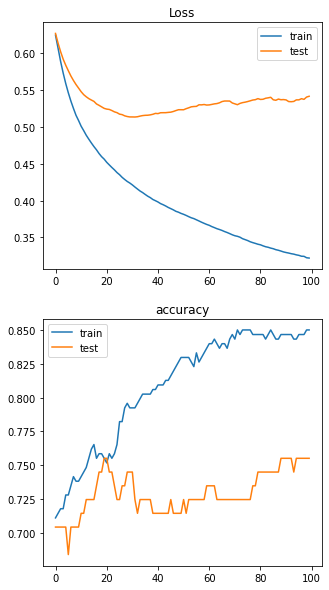

In [51]:
# See how your model is doing
plot_history(history, 'accuracy')

## Evaluation



Training Scores
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       196
           1       0.78      0.78      0.78        98

    accuracy                           0.85       294
   macro avg       0.84      0.83      0.84       294
weighted avg       0.85      0.85      0.85       294



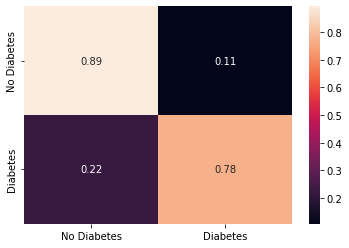



Testing Scores
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        66
           1       0.62      0.62      0.62        32

    accuracy                           0.76        98
   macro avg       0.72      0.72      0.72        98
weighted avg       0.76      0.76      0.76        98



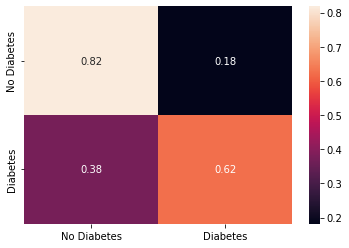

In [52]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['No Diabetes', 'Diabetes']

# Get training predictions and round them to integers instead of floats
train_preds = np.rint(class_model.predict(X_train))

# Classification Report
print(classification_report(y_train, train_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds = np.rint(class_model.predict(X_test))

# Classification report
print(classification_report(y_test, test_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()


# Adding Dropout layers

In [53]:
# new libraries

from keras.layers import Dropout

# Create your model
n_cols = X_train.shape[1]
class_model2 = Sequential()
class_model2.add(Dense(10000, activation = 'relu', input_dim = X_train.shape[1]))

# add dropout layer
class_model2.add(Dropout(.5)) #. 0.1 say portion of nodes to drop in each epoch

class_model2.add(Dense(1000, activation = 'relu'))

class_model2.add(Dropout(.1))

class_model2.add(Dense(1, activation = 'sigmoid'))

# Compile your model, to use our custom function, set metrics = ['acc']
class_model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
class_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10000)             90000     
                                                                 
 dropout (Dropout)           (None, 10000)             0         
                                                                 
 dense_13 (Dense)            (None, 1000)              10001000  
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_14 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 10,092,001
Trainable params: 10,092,001
Non-trainable params: 0
_________________________________________________________________


In [54]:
visualize_nn(class_model2, description=True, figsize=(10,8))

NameError: ignored

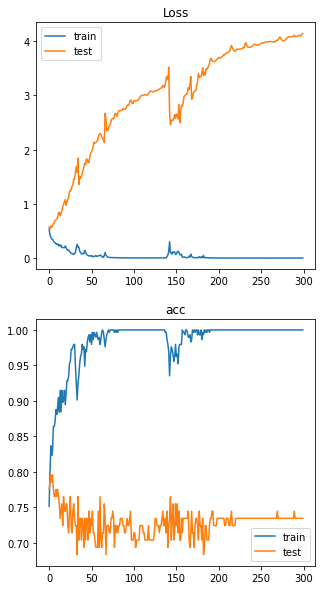

In [55]:
# fit your model
history = class_model2.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 300,verbose=0)

# See how your model is doing
plot_history(history, 'acc')

# Early Stopping

In [56]:
from keras.callbacks import EarlyStopping

# Build your model

class_model3 = Sequential()
class_model3.add(Dense(10, activation = 'relu', input_dim = X_train.shape[1]))
class_model3.add(Dense(10, activation = 'relu'))
class_model3.add(Dense(1, activation = 'sigmoid'))

# Compile your model, to use our custom function, set metrics = ['acc']
class_model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])


Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 0.8339 - acc: 0.6395 - val_loss: 0.7938 - val_acc: 0.6531
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7837 - acc: 0.6463 - val_loss: 0.7499 - val_acc: 0.6531
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7437 - acc: 0.6531 - val_loss: 0.7133 - val_acc: 0.6531
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7098 - acc: 0.6565 - val_loss: 0.6833 - val_acc: 0.6633
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6805 - acc: 0.6633 - val_loss: 0.6604 - val_acc: 0.6327
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6579 - acc: 0.6565 - val_loss: 0.6419 - val_acc: 0.6531
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6381 - acc: 0.6565 - val_loss: 0.6267 - val_acc: 0.6531
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6237 - 

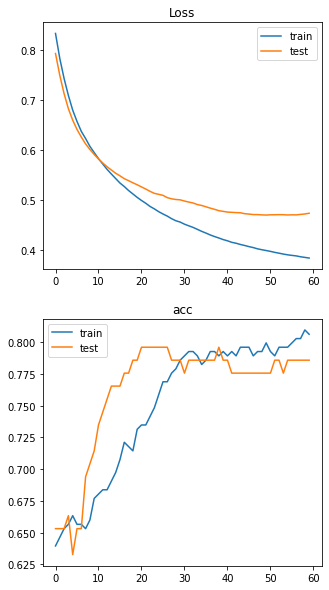

In [57]:
# fit your model
history = class_model3.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100,
                        callbacks=[EarlyStopping(patience=10)]
                           )

# See how your model is doing
plot_history(history, 'acc')

# Use L1 or L2 Kernel Regularization

Can use 'l1', 'l2' or 'l1_l2'

In [60]:
from keras import regularizers

# Build your model
class_model4 = Sequential()
class_model4.add(Dense(10, activation = 'relu', 
                       input_dim = X_train.shape[1],
                       kernel_regularizer=regularizers.l1_l2(l1=.05, l2=.05)
                      ))
class_model4.add(Dense(10, 
                       activation = 'relu',
                       kernel_regularizer=regularizers.l1(.01)
                      ))
class_model4.add(Dense(1, activation = 'sigmoid'))

# Compile your model, to use our custom function, set metrics = ['acc']
class_model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])


In [61]:
# fit your model
history = class_model4.fit(X_train, y_train,
                           validation_data = (X_test, y_test),
                          epochs = 100
                           )

# See how your model is doing


Epoch 1/100
10/10 [==============================] - 22s 28ms/step - loss: 2.5898 - acc: 0.4082 - val_loss: 2.5143 - val_acc: 0.4796
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 2.5026 - acc: 0.4694 - val_loss: 2.4386 - val_acc: 0.5306
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 2.4230 - acc: 0.5102 - val_loss: 2.3669 - val_acc: 0.5612
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 2.3484 - acc: 0.5544 - val_loss: 2.2984 - val_acc: 0.5816
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 2.2771 - acc: 0.5578 - val_loss: 2.2336 - val_acc: 0.6020
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 2.2103 - acc: 0.5850 - val_loss: 2.1700 - val_acc: 0.6020
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 2.1461 - acc: 0.6122 - val_loss: 2.1087 - val_acc: 0.6327
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 2.0842 -

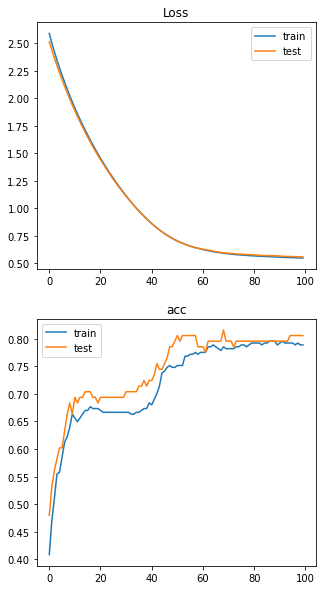

In [63]:
plot_history(history, 'acc')

# Change Batch Size

This is an argument in the `.fit()` method

In [62]:
from keras import regularizers

# Build your model
class_model5 = Sequential()
class_model5.add(Dense(10, activation = 'relu', 
                       input_dim = X_train.shape[1],
                      ))
class_model5.add(Dense(10, 
                       activation = 'relu',
                      ))
class_model5.add(Dense(1, activation = 'sigmoid'))

# Compile your model, to use our custom function, set metrics = ['acc']
class_model5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])


Epoch 1/100
2/2 [==============================] - 1s 216ms/step - loss: 0.9719 - acc: 0.3605 - val_loss: 0.9816 - val_acc: 0.3980
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 0.9505 - acc: 0.3639 - val_loss: 0.9596 - val_acc: 0.3980
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.9291 - acc: 0.3639 - val_loss: 0.9386 - val_acc: 0.3980
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.9096 - acc: 0.3776 - val_loss: 0.9185 - val_acc: 0.3980
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 0.8907 - acc: 0.3776 - val_loss: 0.8995 - val_acc: 0.4082
Epoch 6/100
2/2 [==============================] - 0s 30ms/step - loss: 0.8721 - acc: 0.3980 - val_loss: 0.8815 - val_acc: 0.4286
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.8550 - acc: 0.4116 - val_loss: 0.8645 - val_acc: 0.4592
Epoch 8/100
2/2 [==============================] - 0s 28ms/step - loss: 0.8385 - acc: 0.4

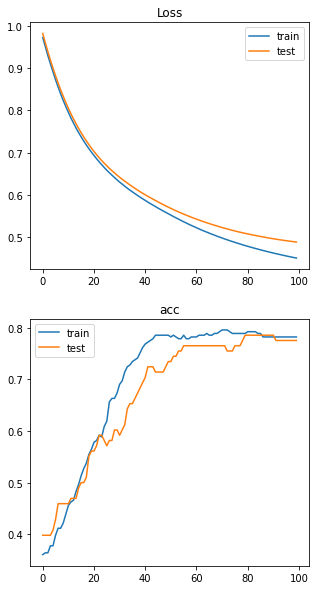

In [64]:
# fit your model
history = class_model5.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        epochs = 100,
                        batch_size=200
                           )

# See how your model is doing
plot_history(history, 'acc')

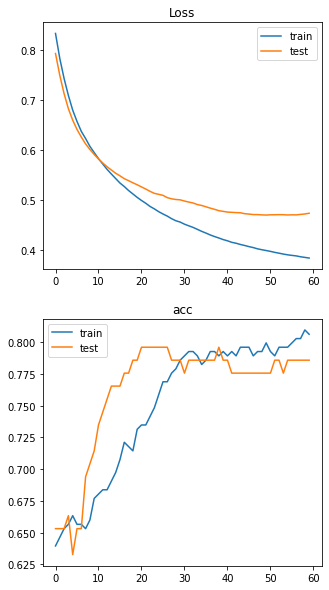

In [58]:
plot_history(history, 'acc')

# Other Options:
1. Fewer Nodes
2. Just 1 layer instead of 2
3. Fewer Epochs
4. More nodes, layers, and/or epochs, but also more regularization
5. Mixing and matching strategies

You can find source of this visual function from here :[source](https://towardsdatascience.com/deep-learning-with-python-neural-networks-complete-tutorial-6b53c0b06af0)

In [ ]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()
